In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
from IPython import display

In [2]:
import numpy as np

In [3]:
import torch

In [4]:
import gym

In [5]:
import time

In [6]:
from gym.envs.registration import register
register(
    id='FrozenLakeNotSlippery-v0',
    entry_point='gym.envs.toy_text:FrozenLakeEnv',
    kwargs={'map_name' : '4x4', 'is_slippery': False},
    max_episode_steps=100,
    reward_threshold=0.78, # optimum = .8196
)

In [7]:
#env = gym.make('FrozenLakeNotSlippery-v0')
#env = gym.make('FrozenLake-v0')
env = gym.make('Taxi-v3')

In [8]:
number_of_states=env.observation_space.n
number_of_actions=env.action_space.n

In [9]:
Q=torch.zeros([number_of_states,number_of_actions])

In [10]:
gamma=0.95

In [11]:
learning_rate=0.9

In [12]:
%%time


num_episodes=1000

steps_total=np.full([num_episodes],-999,dtype=np.int32)
rewards_total=np.full([num_episodes],-999,dtype=np.float32)
for i_episode in range(num_episodes):
    
    state = env.reset()
    #for step in range(100):
    step=0
    #print("____INITIAL STATE____")
    #env.render()
    #print("^^^^^^^^^^^^^^^^^^^^^")
    while True:
        
        step+=1
        
        #action=env.action_space.sample()
        Q_eps=0.001*torch.randn([number_of_actions])
        action=torch.argmax(Q[state]+Q_eps).item()
        new_state, reward, done, info = env.step(action)
        
        Q[state,action]=(1.0-learning_rate)*Q[state,action]+learning_rate*(reward+gamma *torch.max(Q[new_state]).item())
        
        state=new_state
        
        #time.sleep(0.4)
        #print("------------------------")
        #env.render() 
        #print("++++++++++++++++++++++++")
        #print('new state: ',new_state)
        #print('info: ', info)
        
        #show_state(env.env,i_episode,step)
        
        if done:
            steps_total[i_episode]=step
            rewards_total[i_episode]=reward
            print("Episode finished after: {}".format(step))
            break
        

Episode finished after: 200
Episode finished after: 200
Episode finished after: 200
Episode finished after: 200
Episode finished after: 150
Episode finished after: 200
Episode finished after: 200
Episode finished after: 200
Episode finished after: 200
Episode finished after: 82
Episode finished after: 200
Episode finished after: 200
Episode finished after: 153
Episode finished after: 200
Episode finished after: 200
Episode finished after: 199
Episode finished after: 78
Episode finished after: 195
Episode finished after: 200
Episode finished after: 94
Episode finished after: 200
Episode finished after: 148
Episode finished after: 200
Episode finished after: 113
Episode finished after: 200
Episode finished after: 200
Episode finished after: 200
Episode finished after: 200
Episode finished after: 200
Episode finished after: 200
Episode finished after: 200
Episode finished after: 138
Episode finished after: 200
Episode finished after: 64
Episode finished after: 74
Episode finished after: 2

Episode finished after: 12
Episode finished after: 11
Episode finished after: 15
Episode finished after: 15
Episode finished after: 16
Episode finished after: 9
Episode finished after: 12
Episode finished after: 16
Episode finished after: 10
Episode finished after: 10
Episode finished after: 12
Episode finished after: 8
Episode finished after: 15
Episode finished after: 14
Episode finished after: 22
Episode finished after: 11
Episode finished after: 16
Episode finished after: 21
Episode finished after: 14
Episode finished after: 17
Episode finished after: 15
Episode finished after: 19
Episode finished after: 9
Episode finished after: 11
Episode finished after: 19
Episode finished after: 16
Episode finished after: 12
Episode finished after: 18
Episode finished after: 14
Episode finished after: 20
Episode finished after: 10
Episode finished after: 9
Episode finished after: 16
Episode finished after: 19
Episode finished after: 23
Episode finished after: 15
Episode finished after: 12
Episo

Episode finished after: 15
Episode finished after: 8
Episode finished after: 12
Episode finished after: 8
Episode finished after: 14
Episode finished after: 16
Episode finished after: 12
Episode finished after: 14
Episode finished after: 11
Episode finished after: 10
Episode finished after: 14
Episode finished after: 17
Episode finished after: 9
Episode finished after: 8
Episode finished after: 10
Episode finished after: 11
Episode finished after: 14
Episode finished after: 11
Episode finished after: 13
Episode finished after: 13
Episode finished after: 15
Episode finished after: 16
Episode finished after: 9
Episode finished after: 13
Episode finished after: 11
Episode finished after: 12
Episode finished after: 14
Episode finished after: 18
Episode finished after: 12
Episode finished after: 17
Episode finished after: 11
Episode finished after: 18
Episode finished after: 14
Episode finished after: 14
Episode finished after: 12
Episode finished after: 14
Episode finished after: 12
Episod

In [13]:
print("Average number of steps: {}". format(np.average(steps_total)))

Average number of steps: 29.036


In [14]:
print("Average number of steps in last 100 episodes: {}". format(np.average(steps_total[-100:])))

Average number of steps in last 100 episodes: 13.41


In [15]:
print("Fraction of episodes finished succesfully {}".format(np.average(rewards_total)))

Fraction of episodes finished succesfully 19.180999755859375


In [16]:
print("Fraction of episodes finished succesfully in last 100 episodes {}".format(np.average(rewards_total[-100:])))

Fraction of episodes finished succesfully in last 100 episodes 20.0


In [17]:
print(Q)

tensor([[ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
        [-5.2772, -5.5096, -5.7228, -5.5099,  5.2100, -9.0000],
        [-4.7542, -4.8277, -4.8221, -4.8277, 10.9512, -9.0000],
        ...,
        [-3.3642, -3.3724, -3.3642, -4.1121, -9.0000, -9.0000],
        [-6.1625, -6.1568, -6.1625, -6.1631, -9.0000, -9.0000],
        [-0.9000, -0.9000, -0.9000, -0.9900, -9.0000, -9.0000]])


In [18]:
#print(rewards_total)

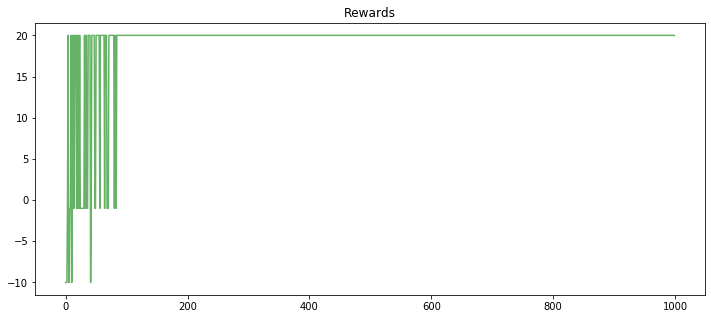

In [21]:
plt.figure(1,figsize=[12,5])
plt.title("Rewards")
plt.plot(torch.arange(len(rewards_total)), rewards_total,alpha=0.6, color='green')
#plt.plot(rewards_total)
plt.show()

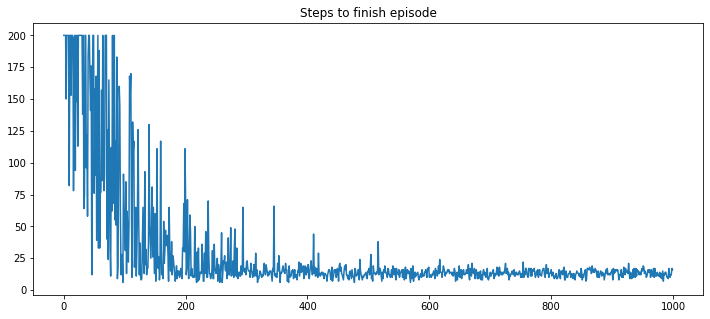

In [20]:
plt.figure(2,figsize=[12,5])
plt.title("Steps to finish episode")
plt.plot(steps_total)
plt.show()

In [22]:
env.env.P

{0: {0: [(1.0, 100, -1, False)],
  1: [(1.0, 0, -1, False)],
  2: [(1.0, 20, -1, False)],
  3: [(1.0, 0, -1, False)],
  4: [(1.0, 16, -1, False)],
  5: [(1.0, 0, -10, False)]},
 1: {0: [(1.0, 101, -1, False)],
  1: [(1.0, 1, -1, False)],
  2: [(1.0, 21, -1, False)],
  3: [(1.0, 1, -1, False)],
  4: [(1.0, 17, -1, False)],
  5: [(1.0, 1, -10, False)]},
 2: {0: [(1.0, 102, -1, False)],
  1: [(1.0, 2, -1, False)],
  2: [(1.0, 22, -1, False)],
  3: [(1.0, 2, -1, False)],
  4: [(1.0, 18, -1, False)],
  5: [(1.0, 2, -10, False)]},
 3: {0: [(1.0, 103, -1, False)],
  1: [(1.0, 3, -1, False)],
  2: [(1.0, 23, -1, False)],
  3: [(1.0, 3, -1, False)],
  4: [(1.0, 19, -1, False)],
  5: [(1.0, 3, -10, False)]},
 4: {0: [(1.0, 104, -1, False)],
  1: [(1.0, 4, -1, False)],
  2: [(1.0, 24, -1, False)],
  3: [(1.0, 4, -1, False)],
  4: [(1.0, 4, -10, False)],
  5: [(1.0, 4, -10, False)]},
 5: {0: [(1.0, 105, -1, False)],
  1: [(1.0, 5, -1, False)],
  2: [(1.0, 25, -1, False)],
  3: [(1.0, 5, -1, False)

In [23]:
env.env.P[8]

{0: [(0.3333333333333333, 4, 0.0, False),
  (0.3333333333333333, 8, 0.0, False),
  (0.3333333333333333, 12, 0.0, True)],
 1: [(0.3333333333333333, 8, 0.0, False),
  (0.3333333333333333, 12, 0.0, True),
  (0.3333333333333333, 9, 0.0, False)],
 2: [(0.3333333333333333, 12, 0.0, True),
  (0.3333333333333333, 9, 0.0, False),
  (0.3333333333333333, 4, 0.0, False)],
 3: [(0.3333333333333333, 9, 0.0, False),
  (0.3333333333333333, 4, 0.0, False),
  (0.3333333333333333, 8, 0.0, False)]}

In [24]:
env.env.P[8][1]

[(0.3333333333333333, 8, 0.0, False),
 (0.3333333333333333, 12, 0.0, True),
 (0.3333333333333333, 9, 0.0, False)]